In [248]:
#This is a copy of the lat_long notebook, with a drop-in replacement of morton with zCurve
#By modifying nothing but the morton algo employed we hpoefully get a sense of zcurves appropriateness/correctness

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zCurve as z
import morton

In [250]:

df = pd.read_csv ('./data/braking_cut_8_brakes.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])


#df = pd.read_csv ('../Data/database_rec_test_csv/opendlv.device.gps.pos.Grp1Data-0.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])
#df.rename(columns = {'timestamp:10881:<lon>':'ts', 'accel_lon:10881:<double>':'accel_lon', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)

In [251]:
df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

In [252]:
df

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718742,11.958157,3.919986,0.958510,1.773054,-0.070448,1646666550045396
1,57.718743,11.958154,3.880830,1.153120,1.779929,-0.113446,1646666550095404
2,57.718744,11.958151,3.842020,1.154697,1.804190,-0.091907,1646666550145481
3,57.718744,11.958148,3.802006,1.139854,1.707745,0.049844,1646666550195461
4,57.718745,11.958145,3.761051,1.152900,1.682915,0.044875,1646666550245397
...,...,...,...,...,...,...,...
4394,57.718744,11.958597,2.942660,-0.109660,-1.716671,0.125163,1646666769752738
4395,57.718742,11.958598,2.974508,-0.200638,-1.606261,-0.168215,1646666769802735
4396,57.718741,11.958598,3.004279,-0.054665,-1.799528,0.009359,1646666769852804
4397,57.718740,11.958599,3.032090,-0.036978,-1.956327,0.030983,1646666769902834


In [253]:
#faktor_multiply = 1000000; offset = 10

#df['lon'] = df.apply(lambda x: int(x['lon']*faktor_multiply) , axis=1)
#df['lat'] = df.apply(lambda x: int(x['lat']*faktor_multiply) , axis=1)

#df.plot(x = 'lon', y = 'lat')

In [254]:
df

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718742,11.958157,3.919986,0.958510,1.773054,-0.070448,1646666550045396
1,57.718743,11.958154,3.880830,1.153120,1.779929,-0.113446,1646666550095404
2,57.718744,11.958151,3.842020,1.154697,1.804190,-0.091907,1646666550145481
3,57.718744,11.958148,3.802006,1.139854,1.707745,0.049844,1646666550195461
4,57.718745,11.958145,3.761051,1.152900,1.682915,0.044875,1646666550245397
...,...,...,...,...,...,...,...
4394,57.718744,11.958597,2.942660,-0.109660,-1.716671,0.125163,1646666769752738
4395,57.718742,11.958598,2.974508,-0.200638,-1.606261,-0.168215,1646666769802735
4396,57.718741,11.958598,3.004279,-0.054665,-1.799528,0.009359,1646666769852804
4397,57.718740,11.958599,3.032090,-0.036978,-1.956327,0.030983,1646666769902834


In [255]:
offset = 10

df['accel_lon'] = df['accel_lon'].add(offset)
df['accel_trans'] = df['accel_trans'].add(offset)
df['accel_down'] = df['accel_down'].add(offset)

faktor_multiply = 10000

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*faktor_multiply) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*faktor_multiply) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*faktor_multiply) , axis=1)

In [256]:
df

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718742,11.958157,3.919986,109585,117730,99295,1646666550045396
1,57.718743,11.958154,3.880830,111531,117799,98865,1646666550095404
2,57.718744,11.958151,3.842020,111546,118041,99080,1646666550145481
3,57.718744,11.958148,3.802006,111398,117077,100498,1646666550195461
4,57.718745,11.958145,3.761051,111529,116829,100448,1646666550245397
...,...,...,...,...,...,...,...
4394,57.718744,11.958597,2.942660,98903,82833,101251,1646666769752738
4395,57.718742,11.958598,2.974508,97993,83937,98317,1646666769802735
4396,57.718741,11.958598,3.004279,99453,82004,100093,1646666769852804
4397,57.718740,11.958599,3.032090,99630,80436,100309,1646666769902834


In [257]:
#encoding into z-codes using morton
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):    
    return m.pack(int(row['accel_lon']), int(row['accel_trans']))


#use morton_py to encode morton codes, for comparison, store it in numpy array then drop temp column from frame
df['morton_py'] = df.apply(set_value, axis=1)
morton_py_cmp = df['morton_py'].to_numpy()
df = df.drop(columns=['morton_py'])

df

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718742,11.958157,3.919986,109585,117730,99295,1646666550045396
1,57.718743,11.958154,3.880830,111531,117799,98865,1646666550095404
2,57.718744,11.958151,3.842020,111546,118041,99080,1646666550145481
3,57.718744,11.958148,3.802006,111398,117077,100498,1646666550195461
4,57.718745,11.958145,3.761051,111529,116829,100448,1646666550245397
...,...,...,...,...,...,...,...
4394,57.718744,11.958597,2.942660,98903,82833,101251,1646666769752738
4395,57.718742,11.958598,2.974508,97993,83937,98317,1646666769802735
4396,57.718741,11.958598,3.004279,99453,82004,100093,1646666769852804
4397,57.718740,11.958599,3.032090,99630,80436,100309,1646666769902834


In [258]:
#zcurve accepts lists, so to conveniently convert a dataframe to a list we first take the two columns Lukas used and make a numpy array
tmp_frame = df[['accel_lon', 'accel_trans']]
df_numpy = tmp_frame.to_numpy()
#then convert from numpy array to list
df_list = df_numpy.tolist()

#encoding into z-codes with zcurve, using 18 bits to be consistent with the implementation above
#an "interlace" method is also available, par_interlace simply means it paralellised
morton_codes = z.par_interlace(df_list, dims=2, bits_per_dim=18)


morton_frame = pd.DataFrame(morton_codes, columns=['morton'])
df = pd.concat([df, morton_frame['morton']], axis=1, ignore_index=True, join='inner')



In [259]:
#compare the two numpy arrays containing z codes produced by morton_py and zCurve for equality
zcurve_cmp = np.asarray(morton_codes)
np.array_equal(zcurve_cmp, morton_py_cmp)

True

In [260]:
#have to re-apply names to columns, as they are lost when using concat?
df.columns = ['lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down', 'ts', 'morton']

In [261]:
dff = df[(df['ts'] > 1646666719952825) & (df['ts'] < 1646666769952825)]
#dff = df[(df['ts'] > 1646666550000000) & (df['ts'] < 1646666570000000)]
# dff = df[(df['ts'] > 1646666563800000) & (df['ts'] < 1646666564800000)]

#dff = df[(df['accel_lon'] > 140000)]
#dff = df[(df['morton'] > 26776019010)]
#dff = df

<AxesSubplot:xlabel='lon'>

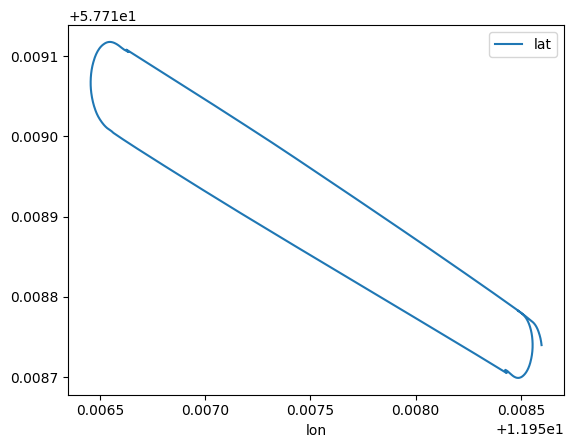

In [262]:
dff.plot(x = 'lon', y = 'lat')

<AxesSubplot:xlabel='ts'>

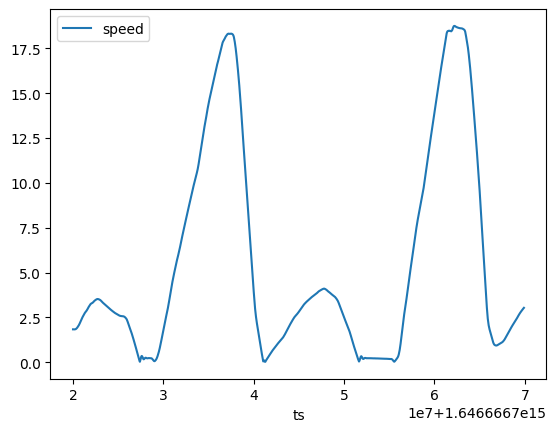

In [263]:
dff.plot(x = 'ts', y = 'speed')

<AxesSubplot:xlabel='ts'>

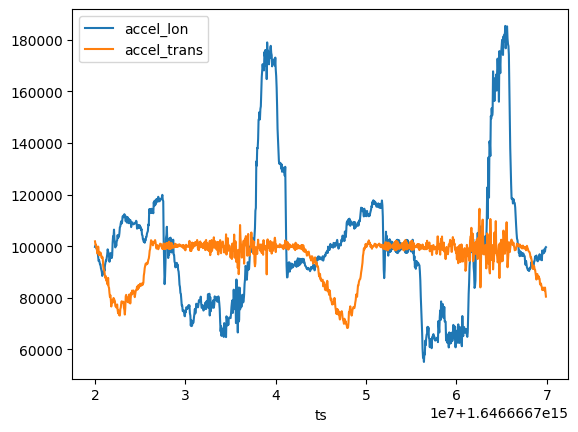

In [264]:
dff.plot(x = 'ts', y=['accel_lon', 'accel_trans'] )

<AxesSubplot:xlabel='accel_lon', ylabel='accel_trans'>

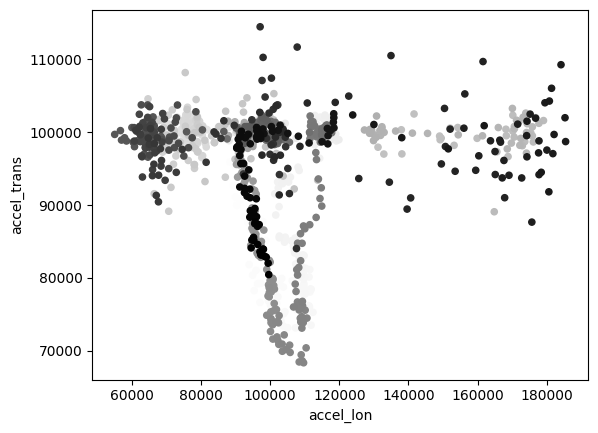

In [265]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

dff.plot(kind='scatter',x='accel_lon',y='accel_trans', color = dff['ts'], ax=ax)

In [266]:
dff

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
3399,57.718783,11.958487,1.832739,99752,101871,101567,1646666720001146,16117918954
3400,57.718782,11.958489,1.831790,100259,100582,97771,1646666720051097,16115952685
3401,57.718782,11.958490,1.830584,99527,100603,99410,1646666720101091,16115628703
3402,57.718782,11.958492,1.829160,99976,99253,97138,1646666720151115,16108145250
3403,57.718782,11.958493,1.831100,98739,99200,99653,1646666720201104,16106898693
...,...,...,...,...,...,...,...,...
4393,57.718745,11.958596,2.909300,97399,83118,100965,1646666769702749,13781474749
4394,57.718744,11.958597,2.942660,98903,82833,101251,1646666769752738,14496469783
4395,57.718742,11.958598,2.974508,97993,83937,98317,1646666769802735,13782415427
4396,57.718741,11.958598,3.004279,99453,82004,100093,1646666769852804,14496577393


In [267]:
#m = morton.Morton(dimensions=2, bits=30)

#dff['accel_lon']

#m.pack(int(dff['accel_lon']), int(dff['accel_trans']))

In [268]:
dff

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
3399,57.718783,11.958487,1.832739,99752,101871,101567,1646666720001146,16117918954
3400,57.718782,11.958489,1.831790,100259,100582,97771,1646666720051097,16115952685
3401,57.718782,11.958490,1.830584,99527,100603,99410,1646666720101091,16115628703
3402,57.718782,11.958492,1.829160,99976,99253,97138,1646666720151115,16108145250
3403,57.718782,11.958493,1.831100,98739,99200,99653,1646666720201104,16106898693
...,...,...,...,...,...,...,...,...
4393,57.718745,11.958596,2.909300,97399,83118,100965,1646666769702749,13781474749
4394,57.718744,11.958597,2.942660,98903,82833,101251,1646666769752738,14496469783
4395,57.718742,11.958598,2.974508,97993,83937,98317,1646666769802735,13782415427
4396,57.718741,11.958598,3.004279,99453,82004,100093,1646666769852804,14496577393


Diagramm incomming...


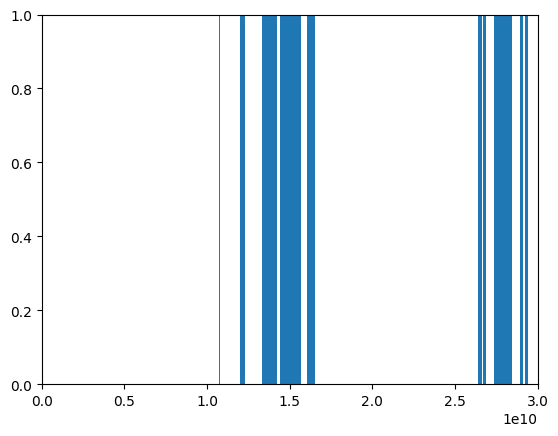

In [269]:
min = dff['morton'].min()
max = dff['morton'].max()
max = 30000000000

print("Diagramm incomming...")

plt.hist(dff['morton'], bins=200)
plt.xlim(0,max)
plt.ylim(0,1)
plt.show()

In [270]:
#dff.to_csv(r'../Data/Ausschnitte/Hard_Braking/Braking_eine_runde.csv', sep=';', index = False)